In [1]:
import tensorflow as tf
import chess
from chess.pgn import read_game
import numpy as np
from anytree import Node
from network import ChessNeuralNetwork
from game import Chess

import time
from agents.nn_agent import NeuralNetworkAgent

ModuleNotFoundError: No module named 'chess_env'

In [2]:
from random import choice, random

def generate_random_fen(density):
    pieces = ['p', 'n', 'b', 'r', 'q', 'P', 'N', 'B', 'R', 'Q']
    rank_fens = []
    for rank in range(8):
        rank_fen = ''
        empty_count = 0
        for file in range(8):
            if random() > density:
                empty_count += 1
            else:
                if empty_count > 0:
                    rank_fen += str(empty_count)
                    empty_count = 0
                piece = choice(pieces)
                rank_fen += piece
        if empty_count > 0:
            rank_fen += str(empty_count)
        rank_fens.append(rank_fen)
    fen = '/'.join(rank_fens)
    
    if random() < .5:
        fen += ' w '
    else:
        fen += ' b '
    casteling_rights = ''
    if random() < .5:
        casteling_rights += 'K'
    if random() < .5:
        casteling_rights += 'Q'
    if random() < .5:
        casteling_rights += 'k'
    if random() < .5:
        casteling_rights += 'q'
    if casteling_rights == '':
        casteling_rights = '--'
    fen += casteling_rights
        
    fen += ' - 0 1'
    return fen

In [11]:
def batch_generator(batch_size):
    while True:
        X = []
        y = []
        for i in range(batch_size):
            fen = generate_random_fen(random())
            board = chess.Board(fen)
            fv = ChessNeuralNetwork.make_feature_vector(board)
            X.append(fv)
            y.append(simple_value(board))
        yield np.array(X), np.array(y)

In [22]:
fen = generate_random_fen(.1)
board = chess.Board(fen)
feature_vector = ChessNeuralNetwork.make_feature_vector(board)
print(sess.run(network.value, feed_dict={network.feature_vector_: feature_vector})[0, 0])
print(simple_value(board))

0.761594
0.761594155956


In [3]:
def random_board_generator(pgn):
    while True:
        game = read_game(pgn)
        if game and len(list(game.main_line())) > 0:
            move_number = np.random.randint(0, high=len(list(game.main_line())) - 1)  # don't take the last move
            while 2 * (game.board().fullmove_number - 1) + int(not game.board().turn) < move_number:
                game = game.variation(0)
            yield game.board()
        else:
            pgn.seek(0)

In [5]:
def board_generator(pgn, return_result=False):
    game = read_game(pgn)
    if return_result:
        result = {'1-0': 1, '1/2-1/2': 0, '0-1': -1}[game.headers['Result']]
    while True:
        if game and len(game.variations):
            game = game.variation(0)
            if return_result:
                yield game.board(), result
            else:
                yield game.board()
        else:
            game = read_game(pgn)
            if return_result:
                result = {'1-0': 1, '1/2-1/2': 0, '0-1': -1}[game.headers['Result']]

In [6]:
pgn = open("./data/millionbase-2.22.pgn")
gen = board_generator(pgn, return_result=False)

In [6]:
Chess.get_simple_value_weights()

array([[-1.],
       [-3.],
       [-3.],
       [-5.],
       [-9.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 5.],
       [ 9.],
       [ 0.],
       [-1.],
       [-3.],
       [-3.],
       [-5.],
       [-9.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 5.],
       [ 9.],
       [ 0.],
       [-1.],
       [-3.],
       [-3.],
       [-5.],
       [-9.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 5.],
       [ 9.],
       [ 0.],
       [-1.],
       [-3.],
       [-3.],
       [-5.],
       [-9.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 5.],
       [ 9.],
       [ 0.],
       [-1.],
       [-3.],
       [-3.],
       [-5.],
       [-9.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 5.],
       [ 9.],
       [ 0.],
       [-1.],
       [-3.],
       [-3.],
       [-5.],
       [-9.],
       [ 0.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 5.],
       [ 9.],
      

In [29]:
from game import Chess
board = gen.__next__()
fv = Chess.make_feature_vector(board)
print(fv.shape)
w = Chess.get_simple_value_weights()
print(w.shape)
v = np.dot(fv, w)
print(v)

(1, 901)
(901, 1)
[[-1.]]


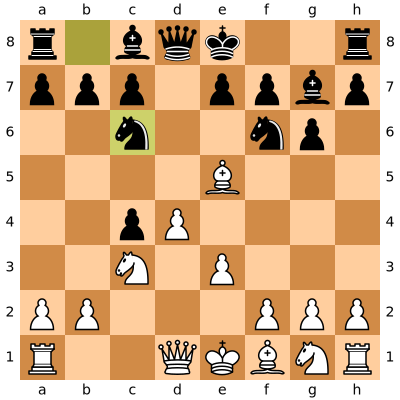

In [30]:
board

In [110]:
import csv 
pgn = open("millionbase-2.22.pgn")
gen = board_generator(pgn, return_result=True)
i=0
while True:
    board, result = gen.__next__()
    fv = Chess.make_feature_vector(board)
    filename = '/Volumes/Passport/data/%i.csv' %i
    np.savetxt(filename, np.array([list(fv[0,:])+[result]]), fmt='%1i', delimiter=",")
    i+=1
    if i%10000==0:
        print(i)

KeyboardInterrupt: 

In [43]:
board = gen.__next__()

In [12]:
board.turn=False

In [14]:
board.turn

False

In [16]:
board.fen()

'rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR b KQkq - 1 2'

In [24]:
int(3/3)

1

In [29]:
8 % 3

2

In [30]:
fen = ''

In [33]:
fen += 'O'

In [34]:
fen

'XO'

In [50]:
xs = np.array([[1,0,1], [0,0,0], [0,0,0]])
os = np.array([[0,1,0], [0,0,0], [1,0,0]])

((xs+os).reshape(9)==0).astype(int)

array([0, 0, 0, 1, 1, 1, 0, 1, 1])

In [39]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [45]:
b = board.copy()

In [46]:
b.pop()

Move.from_uci('b1c3')

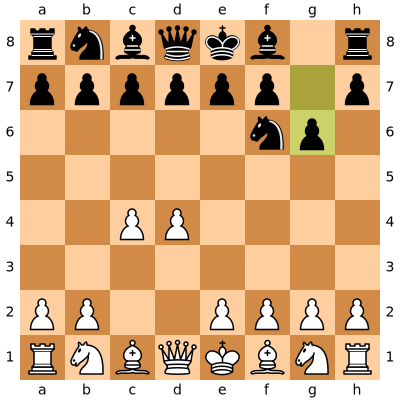

In [47]:
b

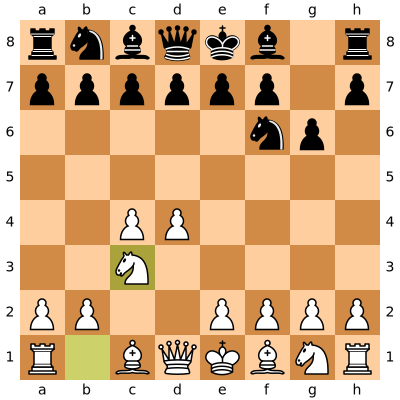

In [48]:
board

In [51]:
from collections import Counter


In [54]:
c = Counter()
c.update([1,0,1,-1,-1,1])

In [55]:
c

Counter({-1: 2, 0: 1, 1: 3})

In [56]:
c.items()

dict_items([(1, 3), (0, 1), (-1, 2)])

In [57]:
from random import random
random()

0.4313492893376547

In [58]:
import tensorflow as tf

In [67]:
sess = tf.InteractiveSession()

In [69]:
x = tf.Variable(np.arange(10))
sess.run(tf.global_variables_initializer())

In [76]:
sess.run(tf.slice(x,[9],[1]))

array([9])

In [66]:
sess.close()

In [16]:
from boardgame_envs.tic_tac_toe_env import TicTacToeEnv, TicTacToeBoard
import numpy as np

In [2]:
env = TicTacToeEnv()

In [9]:
env._print()

  | | 
-------
  |O|X
-------
  | | 



In [10]:
env.get_legal_moves()

array([0, 1, 2, 3, 6, 7, 8])

In [8]:
env.make_move(4)

In [26]:
make_feature_vector(env.board)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
         1.,  1.]])

In [13]:
env.board.xs.reshape(9)

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [25]:
def make_feature_vector(board):
    fv = np.zeros((1, 28))
    fv[0, :9] = board.xs.reshape(9)
    fv[0, 9:18] = board.os.reshape(9)
    fv[0, 18:27] = ((board.xs + board.os).reshape(9) == 0).astype(int)
    fv[0, -1] = int(board.turn)
    return fv

In [18]:
fv = np.zeros((1, 28))

In [19]:
fv

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

In [21]:
fv[0, :9] = env.board.xs.reshape(9)

In [22]:
fv

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

In [23]:
fv[0, 9:18] = env.board.os.reshape(9)

In [24]:
fv

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])